In [67]:
# LA County: Education Levels by Census Tract
# Author: Katrina Deloso
# In this analysis, I will use data from Census Reporter to map out the percentage of each census tract that have attained different levels of education. The education levels begin at 5th grade and end at PhD. Knowing that education level is positively correlated to park access in LA, I wanted to examine which census tracts are, on average, more highly education. We can overlay this map then over a base map to show whether the more highly educated census tracts do in fact have greater access to green space.

In [68]:
# First, I import several data sets to analyze data (both general data and spatial data), provide basemaps, and support plots
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [69]:
# Next, I need to import the data set. I pulled data from the Census Reporter website, looking at highest level of education attained, sorted by census tract
gdf = gpd.read_file('acs2019_5yr_B15003_14000US06037534001.geojson')

In [70]:
# I use .shape to know how many rows and columns (rows, columns) the dataframe has
# I learn that there are 2347 rows and 53 columns
gdf.shape

(2347, 53)

In [71]:
gdf.head()

geoid                                   name  B15003001  \
0        05000US06037                 Los Angeles County, CA  6886895.0   
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     3118.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     2687.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     4216.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     2646.0   

   B15003001, Error  B15003002  B15003002, Error  B15003003  B15003003, Error  \
0               0.0   242811.0            4154.0     2187.0             279.0   
1             312.0       85.0              71.0        6.0              12.0   
2             228.0        1.0               3.0        0.0              12.0   
3             363.0      245.0             140.0        0.0              17.0   
4             195.0      148.0              70.0        0.0              12.0   

   B15003004  B15003004, Error  B15003005  B15003005, Error  B15003006  \
0     3038.0             365.0    12811.0             803.0    29642.0   
1        0.0              12.0        0.0              12.0        0.0   
2        2.0               4.0        0.0              12.0        0.0   
3        0.0              17.0        0.0              17.0       31.0   
4        0.0              12.0        0.0              12.0       20.0   

   B15003006, Error  B15003007  B15003007, Error  B15003008  B15003008, Error  \
0            1206.0    63894.0            2119.0    37551.0            1414.0   
1              12.0        6.0               9.0        3.0               6.0   
2              12.0       38.0              51.0        0.0              12.0   
3              49.0        0.0              17.0       34.0              53.0   
4              31.0       24.0              26.0        0.0              12.0   

   B15003009  B15003009, Error  B15003010  B15003010, Error  B15003011  \
0    51315.0            1874.0   269291.0            4609.0    41314.0   
1       26.0              33.0       24.0              36.0        0.0   
2        0.0              12.0       21.0              30.0       59.0   
3       54.0              87.0      101.0              90.0        0.0   
4       31.0              35.0       26.0              26.0       17.0   

   B15003011, Error  B15003012  B15003012, Error  B15003013  B15003013, Error  \
0            1319.0    90436.0            2684.0   175271.0            3769.0   
1              12.0        7.0              13.0      131.0             114.0   
2              50.0        7.0              12.0        0.0              12.0   
3              17.0       24.0              32.0       30.0              45.0   
4              26.0       10.0              15.0        5.0               8.0   

   B15003014  B15003014, Error  B15003015  B15003015, Error  B15003016  \
0    87658.0            1893.0   132062.0            3041.0   197778.0   
1       44.0              42.0       52.0              47.0       89.0   
2       11.0              18.0        9.0              13.0       16.0   
3       93.0              99.0       31.0              29.0       34.0   
4       93.0              64.0       50.0              34.0      103.0   

   B15003016, Error  B15003017  B15003017, Error  B15003018  B15003018, Error  \
0            3825.0  1296682.0           10732.0   122767.0            3002.0   
1              55.0      711.0             165.0       39.0              41.0   
2              19.0      650.0             215.0       77.0              46.0   
3              41.0      906.0             233.0       90.0              59.0   
4              59.0      678.0             171.0       46.0              33.0   

   B15003019  B15003019, Error  B15003020  B15003020, Error  B15003021  \
0   305982.0            5398.0  1001003.0            7327.0   482323.0   
1      228.0              82.0      660.0             213.0      278.0   
2      151.0              71.0      495.0              97.0 

In [72]:
# Next, I need to make sure that I can see all rows and columns by scrolling (since jupyter hides the middle ones by default)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [73]:
# Check to make sure my last action worked
gdf.head()

geoid                                   name  B15003001  \
0        05000US06037                 Los Angeles County, CA  6886895.0   
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     3118.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     2687.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     4216.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     2646.0   

   B15003001, Error  B15003002  B15003002, Error  B15003003  B15003003, Error  \
0               0.0   242811.0            4154.0     2187.0             279.0   
1             312.0       85.0              71.0        6.0              12.0   
2             228.0        1.0               3.0        0.0              12.0   
3             363.0      245.0             140.0        0.0              17.0   
4             195.0      148.0              70.0        0.0              12.0   

   B15003004  B15003004, Error  B15003005  B15003005, Error  B15003006  \
0     3038.0             365.0    12811.0             803.0    29642.0   
1        0.0              12.0        0.0              12.0        0.0   
2        2.0               4.0        0.0              12.0        0.0   
3        0.0              17.0        0.0              17.0       31.0   
4        0.0              12.0        0.0              12.0       20.0   

   B15003006, Error  B15003007  B15003007, Error  B15003008  B15003008, Error  \
0            1206.0    63894.0            2119.0    37551.0            1414.0   
1              12.0        6.0               9.0        3.0               6.0   
2              12.0       38.0              51.0        0.0              12.0   
3              49.0        0.0              17.0       34.0              53.0   
4              31.0       24.0              26.0        0.0              12.0   

   B15003009  B15003009, Error  B15003010  B15003010, Error  B15003011  \
0    51315.0            1874.0   269291.0            4609.0    41314.0   
1       26.0              33.0       24.0              36.0        0.0   
2        0.0              12.0       21.0              30.0       59.0   
3       54.0              87.0      101.0              90.0        0.0   
4       31.0              35.0       26.0              26.0       17.0   

   B15003011, Error  B15003012  B15003012, Error  B15003013  B15003013, Error  \
0            1319.0    90436.0            2684.0   175271.0            3769.0   
1              12.0        7.0              13.0      131.0             114.0   
2              50.0        7.0              12.0        0.0              12.0   
3              17.0       24.0              32.0       30.0              45.0   
4              26.0       10.0              15.0        5.0               8.0   

   B15003014  B15003014, Error  B15003015  B15003015, Error  B15003016  \
0    87658.0            1893.0   132062.0            3041.0   197778.0   
1       44.0              42.0       52.0              47.0       89.0   
2       11.0              18.0        9.0              13.0       16.0   
3       93.0              99.0       31.0              29.0       34.0   
4       93.0              64.0       50.0              34.0      103.0   

   B15003016, Error  B15003017  B15003017, Error  B15003018  B15003018, Error  \
0            3825.0  1296682.0           10732.0   122767.0            3002.0   
1              55.0      711.0             165.0       39.0              41.0   
2              19.0      650.0             215.0       77.0              46.0   
3              41.0      906.0             233.0       90.0              59.0   
4              59.0      678.0             171.0       46.0              33.0   

   B15003019  B15003019, Error  B15003020  B15003020, Error  B15003021  \
0   305982.0            5398.0  1001003.0            7327.0   482323.0   
1      228.0              82.0      660.0             213.0      278.0   
2      151.0              71.0      495.0              97.0 

In [74]:
# By using .info, we can see that the first row (row 0) refers not to a census tract, but to LA County as a whole.
gdf.info

<bound method DataFrame.info of                    geoid                                   name  B15003001  \
0           05000US06037                 Los Angeles County, CA  6886895.0   
1     14000US06037101110  Census Tract 1011.10, Los Angeles, CA     3118.0   
2     14000US06037101122  Census Tract 1011.22, Los Angeles, CA     2687.0   
3     14000US06037101210  Census Tract 1012.10, Los Angeles, CA     4216.0   
4     14000US06037101220  Census Tract 1012.20, Los Angeles, CA     2646.0   
5     14000US06037101300     Census Tract 1013, Los Angeles, CA     3263.0   
6     14000US06037101400     Census Tract 1014, Los Angeles, CA     2645.0   
7     14000US06037102103  Census Tract 1021.03, Los Angeles, CA     1378.0   
8     14000US06037102104  Census Tract 1021.04, Los Angeles, CA     2752.0   
9     14000US06037102105  Census Tract 1021.05, Los Angeles, CA     1373.0   
10    14000US06037102107  Census Tract 1021.07, Los Angeles, CA     3280.0   
11    14000US06037103101  Census

In [75]:
# Additionally, by using .info(), we can look at the types of data (ex. float, object, geometry)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2347 non-null   object  
 1   name              2347 non-null   object  
 2   B15003001         2347 non-null   float64 
 3   B15003001, Error  2347 non-null   float64 
 4   B15003002         2347 non-null   float64 
 5   B15003002, Error  2347 non-null   float64 
 6   B15003003         2347 non-null   float64 
 7   B15003003, Error  2347 non-null   float64 
 8   B15003004         2347 non-null   float64 
 9   B15003004, Error  2347 non-null   float64 
 10  B15003005         2347 non-null   float64 
 11  B15003005, Error  2347 non-null   float64 
 12  B15003006         2347 non-null   float64 
 13  B15003006, Error  2347 non-null   float64 
 14  B15003007         2347 non-null   float64 
 15  B15003007, Error  2347 non-null   float64 
 16  B15003008       

In [76]:
# Since row 0 refers to LA County but not a specific census tract, I need to drop that row so that it doesn't confuse my analysis
# I do this using .drop[(row)], and then redefine that new set as gdf again to avoid confusion
gdf = gdf.drop([0])

In [77]:
# Check to make sure that operation worked
gdf.head()

geoid                                   name  B15003001  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     3118.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     2687.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     4216.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     2646.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA     3263.0   

   B15003001, Error  B15003002  B15003002, Error  B15003003  B15003003, Error  \
1             312.0       85.0              71.0        6.0              12.0   
2             228.0        1.0               3.0        0.0              12.0   
3             363.0      245.0             140.0        0.0              17.0   
4             195.0      148.0              70.0        0.0              12.0   
5             335.0       49.0              43.0        0.0              12.0   

   B15003004  B15003004, Error  B15003005  B15003005, Error  B15003006  \
1        0.0              12.0        0.0              12.0        0.0   
2        2.0               4.0        0.0              12.0        0.0   
3        0.0              17.0        0.0              17.0       31.0   
4        0.0              12.0        0.0              12.0       20.0   
5        0.0              12.0        0.0              12.0       44.0   

   B15003006, Error  B15003007  B15003007, Error  B15003008  B15003008, Error  \
1              12.0        6.0               9.0        3.0               6.0   
2              12.0       38.0              51.0        0.0              12.0   
3              49.0        0.0              17.0       34.0              53.0   
4              31.0       24.0              26.0        0.0              12.0   
5              55.0        0.0              12.0        0.0              12.0   

   B15003009  B15003009, Error  B15003010  B15003010, Error  B15003011  \
1       26.0              33.0       24.0              36.0        0.0   
2        0.0              12.0       21.0              30.0       59.0   
3       54.0              87.0      101.0              90.0        0.0   
4       31.0              35.0       26.0              26.0       17.0   
5        0.0              12.0       28.0              30.0       32.0   

   B15003011, Error  B15003012  B15003012, Error  B15003013  B15003013, Error  \
1              12.0        7.0              13.0      131.0             114.0   
2              50.0        7.0              12.0        0.0              12.0   
3              17.0       24.0              32.0       30.0              45.0   
4              26.0       10.0              15.0        5.0               8.0   
5              40.0        0.0              12.0        0.0              12.0   

   B15003014  B15003014, Error  B15003015  B15003015, Error  B15003016  \
1       44.0              42.0       52.0              47.0       89.0   
2       11.0              18.0        9.0              13.0       16.0   
3       93.0              99.0       31.0              29.0       34.0   
4       93.0              64.0       50.0              34.0      103.0   
5       34.0              32.0       84.0              79.0       63.0   

   B15003016, Error  B15003017  B15003017, Error  B15003018  B15003018, Error  \
1              55.0      711.0             165.0       39.0              41.0   
2              19.0      650.0             215.0       77.0              46.0   
3              41.0      906.0             233.0       90.0              59.0   
4              59.0      678.0             171.0       46.0              33.0   
5              66.0      772.0             195.0       80.0              45.0   

   B15003019  B15003019, Error  B15003020  B15003020, Error  B15003021  \
1      228.0              82.0      660.0             213.0      278.0   
2      151.0              71.0      495.0              97.0      277.0   
3      265.0             109.0      850.0             207.0 

In [78]:
# I need to change the column headers so that I can understand what they're actually referring to. First, I get a list of the current headers
list(gdf)

['geoid',
 'name',
 'B15003001',
 'B15003001, Error',
 'B15003002',
 'B15003002, Error',
 'B15003003',
 'B15003003, Error',
 'B15003004',
 'B15003004, Error',
 'B15003005',
 'B15003005, Error',
 'B15003006',
 'B15003006, Error',
 'B15003007',
 'B15003007, Error',
 'B15003008',
 'B15003008, Error',
 'B15003009',
 'B15003009, Error',
 'B15003010',
 'B15003010, Error',
 'B15003011',
 'B15003011, Error',
 'B15003012',
 'B15003012, Error',
 'B15003013',
 'B15003013, Error',
 'B15003014',
 'B15003014, Error',
 'B15003015',
 'B15003015, Error',
 'B15003016',
 'B15003016, Error',
 'B15003017',
 'B15003017, Error',
 'B15003018',
 'B15003018, Error',
 'B15003019',
 'B15003019, Error',
 'B15003020',
 'B15003020, Error',
 'B15003021',
 'B15003021, Error',
 'B15003022',
 'B15003022, Error',
 'B15003023',
 'B15003023, Error',
 'B15003024',
 'B15003024, Error',
 'B15003025',
 'B15003025, Error',
 'geometry']

In [79]:
# This makes me realize I have WAY too many columns. I need to get rid of the margin of error columns.
columns_to_keep = ['geoid',
 'name',
'B15003001',
 'B15003002',
 'B15003003',
 'B15003004',
 'B15003005',
 'B15003006',
 'B15003007',
 'B15003008',
 'B15003009',
 'B15003010',
 'B15003011',
 'B15003012',
 'B15003013',
 'B15003014',
 'B15003015',
 'B15003016',
 'B15003017',
 'B15003018',
 'B15003019',
 'B15003020',
 'B15003021',
 'B15003022',
 'B15003023',
 'B15003024',
 'B15003025',
 'geometry']
gdf = gdf[columns_to_keep]

In [80]:
# Quick check to make sure that worked
gdf.head()

geoid                                   name  B15003001  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     3118.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     2687.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     4216.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     2646.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA     3263.0   

   B15003002  B15003003  B15003004  B15003005  B15003006  B15003007  \
1       85.0        6.0        0.0        0.0        0.0        6.0   
2        1.0        0.0        2.0        0.0        0.0       38.0   
3      245.0        0.0        0.0        0.0       31.0        0.0   
4      148.0        0.0        0.0        0.0       20.0       24.0   
5       49.0        0.0        0.0        0.0       44.0        0.0   

   B15003008  B15003009  B15003010  B15003011  B15003012  B15003013  \
1        3.0       26.0       24.0        0.0        7.0      131.0   
2        0.0        0.0       21.0       59.0        7.0        0.0   
3       34.0       54.0      101.0        0.0       24.0       30.0   
4        0.0       31.0       26.0       17.0       10.0        5.0   
5        0.0        0.0       28.0       32.0        0.0        0.0   

   B15003014  B15003015  B15003016  B15003017  B15003018  B15003019  \
1       44.0       52.0       89.0      711.0       39.0      228.0   
2       11.0        9.0       16.0      650.0       77.0      151.0   
3       93.0       31.0       34.0      906.0       90.0      265.0   
4       93.0       50.0      103.0      678.0       46.0      107.0   
5       34.0       84.0       63.0      772.0       80.0      185.0   

   B15003020  B15003021  B15003022  B15003023  B15003024  B15003025  \
1      660.0      278.0      486.0      120.0       63.0       60.0   
2      495.0      277.0      511.0      257.0        0.0      105.0   
3      850.0      449.0      694.0      207.0       34.0       44.0   
4      470.0      197.0      404.0      170.0       20.0       27.0   
5      537.0      336.0      519.0      342.0      109.0       49.0   

                                            geometry  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
5  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

In [81]:
# I'm trying to figure out how to collapse columns so that I can have a "5th to 8th Grade" column instead of 4 separate columns
# The first method I try fails because I'm using a method that concatenates strings, instead of summarizing floats
# gdf['Finished 5th to 8th grade'] = gdf[['B15003001', 'B15003002', 'B15003003', 'B15003004']].apply(lambda x: ' '.join(x), axis = 1) 
# print(gdf)


In [82]:
# I try a new method, practicing on just the 5th and 6th grade columns. For some reason, this just gives me back the original 5th grade column
# fifthandsixth = gdf['B15003001'] + gdf['B15003002']
# gdf['5th & 6th'] = fifthandsixth
# print(gdf)

In [83]:
# After trying a few more things, I give up for now so that I can focus on the rest of the assignment :(

In [84]:
# I decide to just drop the first few columns, from no school through 4th grade.
columns_to_keep = ['geoid',
 'name',
'B15003001',
 'B15003009',
 'B15003010',
 'B15003011',
 'B15003012',
 'B15003013',
 'B15003014',
 'B15003015',
 'B15003016',
 'B15003017',
 'B15003018',
 'B15003019',
 'B15003020',
 'B15003021',
 'B15003022',
 'B15003023',
 'B15003024',
 'B15003025',
 'geometry']
gdf = gdf[columns_to_keep]

In [85]:
# Next, I name my long list of columns with the headers in the metadata
# I change the headers from "Bachelor's degree" to just "Bachelors degree" since the apostrophe interferes with the function
gdf.columns = ['geoid',
'name', 
'Total',
 '5th grade',
 '6th grade',
 '7th grade',
 '8th grade',
 '9th grade',
 '10th grade',
 '11th grade',
 '12th grade, no diploma',
 'Regular high school diploma',
 'GED or alternative credential',
 'Some college, less than 1 year',
 'Some college, 1 or more years, no degree',
 'Bachelors degree',
 'Associates degree',
 'Masters degree',
 'Professional school degree',
 'Doctorate degree',
 'geometry']

In [86]:
# Another quick check
gdf.head()

geoid                                   name   Total  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  3118.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  2687.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  4216.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  2646.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA  3263.0   

   5th grade  6th grade  7th grade  8th grade  9th grade  10th grade  \
1       26.0       24.0        0.0        7.0      131.0        44.0   
2        0.0       21.0       59.0        7.0        0.0        11.0   
3       54.0      101.0        0.0       24.0       30.0        93.0   
4       31.0       26.0       17.0       10.0        5.0        93.0   
5        0.0       28.0       32.0        0.0        0.0        34.0   

   11th grade  12th grade, no diploma  Regular high school diploma  \
1        52.0                    89.0                        711.0   
2         9.0                    16.0                        650.0   
3        31.0                    34.0                        906.0   
4        50.0                   103.0                        678.0   
5        84.0                    63.0                        772.0   

   GED or alternative credential  Some college, less than 1 year  \
1                           39.0                           228.0   
2                           77.0                           151.0   
3                           90.0                           265.0   
4                           46.0                           107.0   
5                           80.0                           185.0   

   Some college, 1 or more years, no degree  Bachelors degree  \
1                                     660.0             278.0   
2                                     495.0             277.0   
3                                     850.0             449.0   
4                                     470.0             197.0   
5                                     537.0             336.0   

   Associates degree  Masters degree  Professional school degree  \
1              486.0           120.0                        63.0   
2              511.0           257.0                         0.0   
3              694.0           207.0                        34.0   
4              404.0           170.0                        20.0   
5              519.0           342.0                       109.0   

   Doctorate degree                                           geometry  
1              60.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2             105.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3              44.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4              27.0  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
5              49.0  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

In [87]:
# I want to get a quick snapshot about the data in the "Total" column - that reflects the census tracts overall (without sorting for education)
gdf['Total'].describe()

count    2346.000000
mean     2935.590367
std      1113.769378
min         0.000000
25%      2200.250000
50%      2855.000000
75%      3636.750000
max      9145.000000
Name: Total, dtype: float64

In [88]:
# Now I want to sort by most populous census tract (descending order of values)
gdf_sorted = gdf.sort_values(by='Total',ascending = False)
gdf_sorted[['geoid','Total']].head(10)

geoid   Total
923   14000US06037275602  9145.0
2147  14000US06037702901  8133.0
2198  14000US06037901004  8017.0
2206  14000US06037901205  7098.0
994   14000US06037300600  7044.0
532   14000US06037206020  6889.0
2107  14000US06037700200  6781.0
2236  14000US06037910705  6519.0
1938  14000US06037577603  6346.0
1844  14000US06037571200  6328.0

In [89]:
# I can also look to see which census tracts have the greatest number of PhDs
gdf_sorted = gdf.sort_values(by='Doctorate degree',ascending = False)
gdf_sorted[['geoid','Doctorate degree']].head(10)
# (It turns out to be tract 4635, in Pasadena close to CalTech)

geoid  Doctorate degree
1382  14000US06037463500             763.0
860   14000US06037267200             634.0
1095  14000US06037401902             532.0
923   14000US06037275602             496.0
1093  14000US06037401800             479.0
1341  14000US06037460100             472.0
1403  14000US06037480600             397.0
893   14000US06037271600             348.0
2123  14000US06037701304             329.0
1384  14000US06037463602             318.0

In [90]:
# I try to have it sort by the census tracts with the greatest number of Doctorate or Masters degrees, but it still sorts just by Doctorate degrees
gdf_sorted = gdf.sort_values(by='Doctorate degree' or 'Masters degree',ascending = False)
gdf_sorted[['geoid','Doctorate degree','Masters degree']].head(10)

geoid  Doctorate degree  Masters degree
1382  14000US06037463500             763.0           843.0
860   14000US06037267200             634.0          1031.0
1095  14000US06037401902             532.0           935.0
923   14000US06037275602             496.0          2245.0
1093  14000US06037401800             479.0          1336.0
1341  14000US06037460100             472.0           829.0
1403  14000US06037480600             397.0          1380.0
893   14000US06037271600             348.0           702.0
2123  14000US06037701304             329.0           896.0
1384  14000US06037463602             318.0          1141.0

In [91]:
# Even when I remove the Doctorate Degree from the viewable columns, it still sorts based on the Doctorate degrees
gdf_sorted = gdf.sort_values(by='Doctorate degree' or 'Masters degree',ascending = False)
gdf_sorted[['geoid','Masters degree']].head(10)

geoid  Masters degree
1382  14000US06037463500           843.0
860   14000US06037267200          1031.0
1095  14000US06037401902           935.0
923   14000US06037275602          2245.0
1093  14000US06037401800          1336.0
1341  14000US06037460100           829.0
1403  14000US06037480600          1380.0
893   14000US06037271600           702.0
2123  14000US06037701304           896.0
1384  14000US06037463602          1141.0

In [92]:
# Nexy I try using "and" to combine the values of that field, but instead it just sorts by the number of master's degrees
gdf_sorted = gdf.sort_values(by='Doctorate degree' and 'Masters degree', ascending = False)
gdf_sorted[['geoid','Doctorate degree','Masters degree']].head(10)

geoid  Doctorate degree  Masters degree
923   14000US06037275602             496.0          2245.0
1403  14000US06037480600             397.0          1380.0
1093  14000US06037401800             479.0          1336.0
2148  14000US06037703001             303.0          1296.0
1938  14000US06037577603             153.0          1253.0
2039  14000US06037620701             238.0          1189.0
2048  14000US06037621104              96.0          1179.0
2147  14000US06037702901             175.0          1168.0
1384  14000US06037463602             318.0          1141.0
2103  14000US06037670701              93.0          1098.0

In [93]:
# Nexy I try using "and" to combine the values of that field, but instead it just sorts by the number of master's degrees
gdf_sorted = gdf.sort_values(by=['Doctorate degree' and 'Masters degree'], ascending = False)
gdf_sorted[['geoid','Doctorate degree','Masters degree']].head(10)

geoid  Doctorate degree  Masters degree
923   14000US06037275602             496.0          2245.0
1403  14000US06037480600             397.0          1380.0
1093  14000US06037401800             479.0          1336.0
2148  14000US06037703001             303.0          1296.0
1938  14000US06037577603             153.0          1253.0
2039  14000US06037620701             238.0          1189.0
2048  14000US06037621104              96.0          1179.0
2147  14000US06037702901             175.0          1168.0
1384  14000US06037463602             318.0          1141.0
2103  14000US06037670701              93.0          1098.0

Text(0.5, 1.0, 'Tracts with the greatest number of Masters degrees')

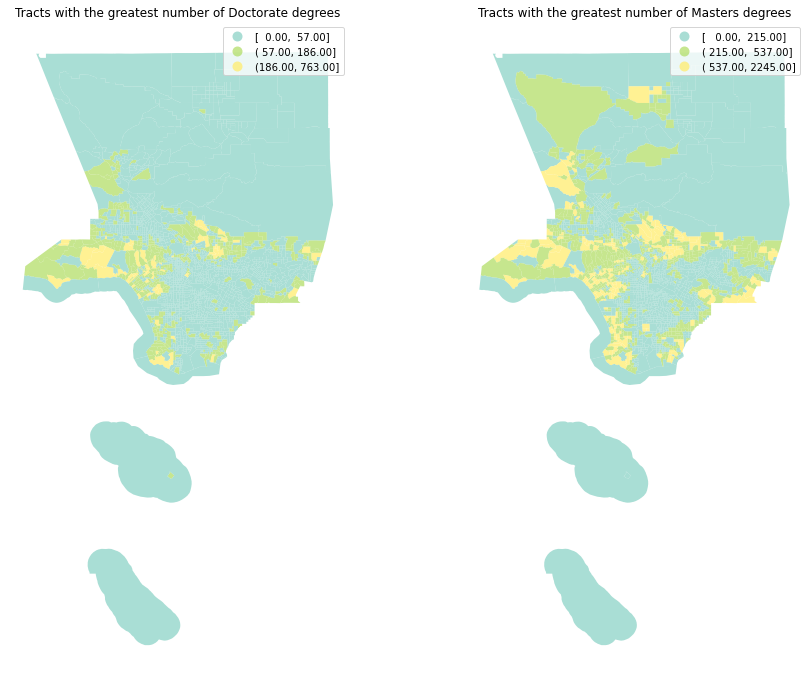

In [94]:
# Taking a break from that, I make side by side graphs to compare where the greatest number of PhDs vs Masters individuals live
# Since there are so few PhDs in general, it's easiest to view when grouping into thirds
# Unsurprisingly, the tracts with the most PhDs overlay onto the tracts with the most Masters students

# create the 1x2 subplots: 1 row with 2 subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

#left map
gdf.plot(column='Doctorate degree',  
            cmap='Set3',
            scheme='NaturalBreaks',
            k=3, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot - ax=ax1 puts it on the left
            legend=True
           )

ax1.axis("off")
ax1.set_title("Tracts with the greatest number of Doctorate degrees")

# right map
gdf.plot(column='Masters degree', 
            cmap='Set3',
            scheme='NaturalBreaks',
            k=3, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot - ax=ax2 puts it on the right
            legend=True
           )

ax2.axis("off")
ax2.set_title("Tracts with the greatest number of Masters degrees")

In [95]:
# Next, I look to see what census tracts are in the top third in terms of number of doctorate degrees
# I choose the number 184, since that's what pandas calculated for me when I asked to split the data into thirds above
gdf[gdf['Doctorate degree']>=184]

geoid                                   name   Total  \
304   14000US06037137103  Census Tract 1371.03, Los Angeles, CA  4395.0   
326   14000US06037139701  Census Tract 1397.01, Los Angeles, CA  3842.0   
327   14000US06037139702  Census Tract 1397.02, Los Angeles, CA  4540.0   
405   14000US06037189500     Census Tract 1895, Los Angeles, CA  3791.0   
461   14000US06037194402  Census Tract 1944.02, Los Angeles, CA  3204.0   
544   14000US06037207501  Census Tract 2075.01, Los Angeles, CA  1913.0   
546   14000US06037207710  Census Tract 2077.10, Los Angeles, CA  4078.0   
547   14000US06037207900     Census Tract 2079, Los Angeles, CA  5507.0   
638   14000US06037216300     Census Tract 2163, Los Angeles, CA  3627.0   
827   14000US06037261200     Census Tract 2612, Los Angeles, CA  3028.0   
829   14000US06037262200     Census Tract 2622, Los Angeles, CA  3139.0   
834   14000US06037262501  Census Tract 2625.01, Los Angeles, CA  2605.0   
836   14000US06037262604  Census Tract 2626.04, Los Angeles, CA  4128.0   
841   14000US06037264102  Census Tract 2641.02, Los Angeles, CA  2492.0   
844   14000US06037264302  Census Tract 2643.02, Los Angeles, CA  4659.0   
845   14000US06037265100     Census Tract 2651, Los Angeles, CA  2033.0   
854   14000US06037265510  Census Tract 2655.10, Los Angeles, CA  2666.0   
856   14000US06037265601  Census Tract 2656.01, Los Angeles, CA  2595.0   
858   14000US06037265700     Census Tract 2657, Los Angeles, CA  3803.0   
859   14000US06037267100     Census Tract 2671, Los Angeles, CA  5083.0   
860   14000US06037267200     Census Tract 2672, Los Angeles, CA  5453.0   
872   14000US06037269000     Census Tract 2690, Los Angeles, CA  3653.0   
893   14000US06037271600     Census Tract 2716, Los Angeles, CA  3303.0   
895   14000US06037271702  Census Tract 2717.02, Los Angeles, CA  2937.0   
914   14000US06037274100     Census Tract 2741, Los Angeles, CA  3698.0   
915   14000US06037274202  Census Tract 2742.02, Los Angeles, CA  3786.0   
923   14000US06037275602  Census Tract 2756.02, Los Angeles, CA  9145.0   
998   14000US06037300901  Census Tract 3009.01, Los Angeles, CA  4721.0   
1003  14000US06037301204  Census Tract 3012.04, Los Angeles, CA  4170.0   
1020  14000US06037302102  Census Tract 3021.02, Los Angeles, CA  4904.0   
1060  14000US06037400204  Census Tract 4002.04, Los Angeles, CA  4295.0   
1062  14000US06037400206  Census Tract 4002.06, Los Angeles, CA  3822.0   
1093  14000US06037401800     Census Tract 4018, Los Angeles, CA  5707.0   
1095  14000US06037401902  Census Tract 4019.02, Los Angeles, CA  4707.0   
1136  14000US06037403324  Census Tract 4033.24, Los Angeles, CA  5130.0   
1277  14000US06037430502  Census Tract 4305.02, Los Angeles, CA  5278.0   
1341  14000US06037460100     Census Tract 4601, Los Angeles, CA  4799.0   
1346  14000US06037460501  Census Tract 4605.01, Los Angeles, CA  3946.0   
1347  14000US06037460502  Census Tract 4605.02, Los Angeles, CA  2866.0   
1348  14000US06037460600     Census Tract 4606, Los Angeles, CA  2994.0   
1350  14000US06037460800     Census Tract 4608, Los Angeles, CA  2368.0   
1355  14000US06037461300     Census Tract 4613, Los Angeles, CA  5031.0   
1367  14000US06037462202  Census Tract 4622.02, Los Angeles, CA  2201.0   
1371  14000US06037462500     Census Tract 4625, Los Angeles, CA  4533.0   
1382  14000US06037463500     Census Tract 4635, Los Angeles, CA  4105.0   
1383  14000US06037463601  Census Tract 4636.01, Los Angeles, CA  4857.0   
1384  14000US06037463602  Census Tract 4636.02, Los Angeles, CA  4638.0   
1388  14000US06037464000     Census Tract 4640, Los Angeles, CA  4624.0   
1389  14000US06037464100     Census Tract 4641, Los Angeles, CA  5265.0   
1402  14000US06037480500     Census Tract 4805, Los Angeles, CA  3702.0   
1403  14000US06037480600     Census Tract 4806, Los Angeles, CA  5613.0   
1795  14000US06037554512  Census Tract 5545.12, Los Angeles, CA  4720.0   
1932  14000US06037577200     Census Tract 57

In [96]:
# I want to know how many tracts have 184 or more doctorate degrees, so I use .count. 
# Turns out there are 77 tracts
gdf[gdf['Doctorate degree']>=184].count()

geoid                                       77
name                                        77
Total                                       77
5th grade                                   77
6th grade                                   77
7th grade                                   77
8th grade                                   77
9th grade                                   77
10th grade                                  77
11th grade                                  77
12th grade, no diploma                      77
Regular high school diploma                 77
GED or alternative credential               77
Some college, less than 1 year              77
Some college, 1 or more years, no degree    77
Bachelors degree                            77
Associates degree                           77
Masters degree                              77
Professional school degree                  77
Doctorate degree                            77
geometry                                    77
dtype: int64

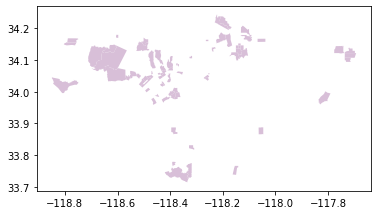

In [97]:
#I map the census tracts that have 184 or more Doctorate degrees
gdf[gdf['Doctorate degree']>=184].plot(color='thistle')

Text(0.5, 1.0, 'Tracts with 537 or more Masters degrees')

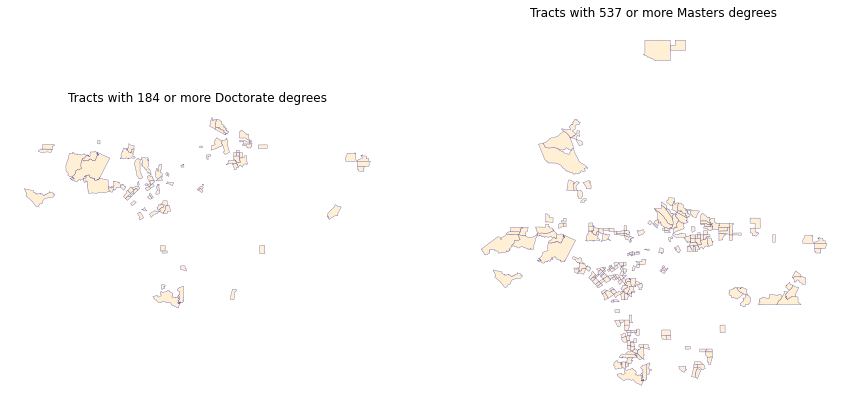

In [98]:
# Now I want to map just the census tracts that are in the top third in terms of Doctorate and Masters degrees
# I use 184 as the starting point for the top third of PhDs, and 537 for the top third of Masters degrees

fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

#left map
gdf[gdf['Doctorate degree']>=184].plot(
            color='papayawhip', 
            edgecolor='darkslateblue',
            linewidth=0.3,
            ax=ax1)

ax1.axis("off")
ax1.set_title("Tracts with 184 or more Doctorate degrees")

# right map
gdf[gdf['Masters degree']>=537].plot(
            color='papayawhip', 
            edgecolor='darkslateblue',
            linewidth=0.3,
            ax=ax2, # this assigns the map to the subplot - ax=ax2 puts it on the right
           )

ax2.axis("off")
ax2.set_title("Tracts with 537 or more Masters degrees")

In [99]:
# It's finally time to normalize the data by turning it into percentages
gdf['Percent 5th grade'] = gdf['5th grade']/gdf['Total']*100
gdf['Percent 6th grade'] = gdf['6th grade']/gdf['Total']*100
gdf['Percent 7th Grade'] = gdf['7th grade']/gdf['Total']*100
gdf['Percent 8th Grade'] = gdf['8th grade']/gdf['Total']*100
gdf['Percent 9th Grade'] = gdf['9th grade']/gdf['Total']*100
gdf['Percent 10th Grade'] = gdf['10th grade']/gdf['Total']*100
gdf['Percent 11th Grade'] = gdf['11th grade']/gdf['Total']*100
gdf['Percent 12th Grade, no diploma'] = gdf['12th grade, no diploma']/gdf['Total']*100
gdf['Percent Regular high school diploma'] = gdf['Regular high school diploma']/gdf['Total']*100
gdf['Percent GED or alternative credential'] = gdf['GED or alternative credential']/gdf['Total']*100
gdf['Percent Some college, less than 1 year'] = gdf['Some college, less than 1 year']/gdf['Total']*100
gdf['Percent Some college, 1 or more years, no degree'] = gdf['Some college, 1 or more years, no degree']/gdf['Total']*100
gdf['Percent Bachelors degree'] = gdf['Bachelors degree']/gdf['Total']*100
gdf['Percent Associates degree'] = gdf['Associates degree']/gdf['Total']*100
gdf['Percent Masters degree'] = gdf['Masters degree']/gdf['Total']*100
gdf['Percent Professional school degree'] = gdf['Professional school degree']/gdf['Total']*100
gdf['Percent Doctorate degree'] = gdf['Doctorate degree']/gdf['Total']*100

In [100]:
# Check to make sure this worked
gdf.head()

geoid                                   name   Total  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  3118.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  2687.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  4216.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  2646.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA  3263.0   

   5th grade  6th grade  7th grade  8th grade  9th grade  10th grade  \
1       26.0       24.0        0.0        7.0      131.0        44.0   
2        0.0       21.0       59.0        7.0        0.0        11.0   
3       54.0      101.0        0.0       24.0       30.0        93.0   
4       31.0       26.0       17.0       10.0        5.0        93.0   
5        0.0       28.0       32.0        0.0        0.0        34.0   

   11th grade  12th grade, no diploma  Regular high school diploma  \
1        52.0                    89.0                        711.0   
2         9.0                    16.0                        650.0   
3        31.0                    34.0                        906.0   
4        50.0                   103.0                        678.0   
5        84.0                    63.0                        772.0   

   GED or alternative credential  Some college, less than 1 year  \
1                           39.0                           228.0   
2                           77.0                           151.0   
3                           90.0                           265.0   
4                           46.0                           107.0   
5                           80.0                           185.0   

   Some college, 1 or more years, no degree  Bachelors degree  \
1                                     660.0             278.0   
2                                     495.0             277.0   
3                                     850.0             449.0   
4                                     470.0             197.0   
5                                     537.0             336.0   

   Associates degree  Masters degree  Professional school degree  \
1              486.0           120.0                        63.0   
2              511.0           257.0                         0.0   
3              694.0           207.0                        34.0   
4              404.0           170.0                        20.0   
5              519.0           342.0                       109.0   

   Doctorate degree                                           geometry  \
1              60.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...   
2             105.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...   
3              44.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...   
4              27.0  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...   
5              49.0  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...   

   Percent 5th grade  Percent 6th grade  Percent 7th Grade  Percent 8th Grade  \
1           0.833868           0.769724           0.000000           0.224503   
2           0.000000           0.781541           2.195757           0.260514   
3           1.280835           2.395636           0.000000           0.569260   
4           1.171580           0.982615           0.642479           0.377929   
5           0.000000           0.858106           0.980693           0.000000   

   Percent 9th Grade  Percent 10th Grade  Percent 11th Grade  \
1           4.201411            1.411161            1.667736   
2           0.000000            0.409378            0.334946   
3           0.711575            2.205882            0.735294   
4           0.188964            3.514739            1.889645   
5           0.000000            1.041986            2.574318   

   Percent 12th Grade, no diploma  Percent Regular high school diploma  \
1                        2.854394                            22.803079   
2                        0.595460                      

In [101]:
# I try to drop all columns except the percent columns, but get an error that those columns aren't in the index
# percentcolumns_to_keep = ['geoid',
# 'name',
# 'Percent 6th grade'
# 'Percent 7th Grade'
# 'Percent 8th Grade'
# 'Percent 9th Grade'
# 'Percent 10th Grade'
# 'Percent 11th Grade'
# 'Percent 12th Grade, no diploma'
# 'Percent Regular high school diploma'
# 'Percent GED or alternative credential'
# 'Percent Some college, less than 1 year'
# 'Percent Some college, 1 or more years, no degree'
# 'Percent Bachelors degree'
# 'Percent Associates degree'
# 'Percent Masters degree'
# 'Percent Professional school degree'
# 'Percent Doctorate degree'
# 'geometry']
# gdf_percent = gdf[percentcolumns_to_keep]

# I try to reindex using gdf_percent = gdf.reindex(percentcolumns_to_keep)
# But when I check that with gdf_percent.head() I end up with an empty dataset
# Moving on :(

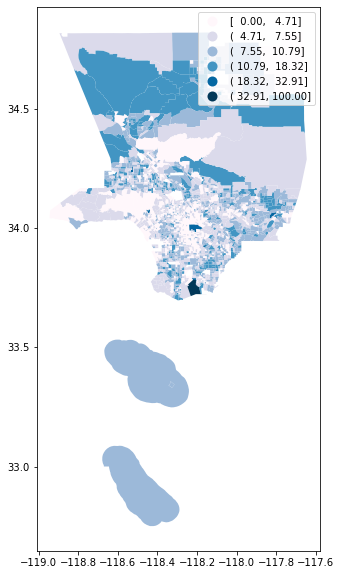

In [102]:
# I'm a little surprised that the concentration of Bachelor's degrees isn't in West LA, which makes me think that's because more people there have graduate degrees?
gdf.plot(figsize=(12,10),
    cmap='PuBu',
    column='Percent Bachelors degree',
    legend=True, 
    scheme='NaturalBreaks',
    k=6,
        )

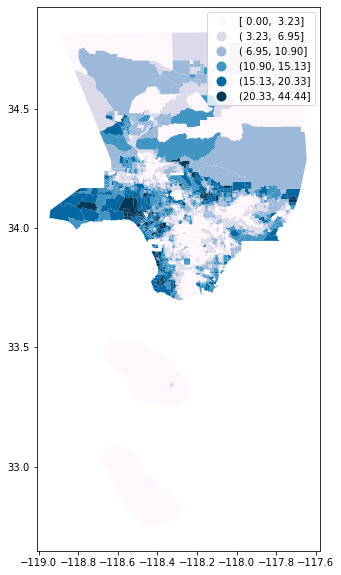

In [103]:
# Yes, that guess seems to be true
gdf.plot(figsize=(12,10),
    cmap='PuBu',
    column='Percent Masters degree',
    legend=True, 
    scheme='NaturalBreaks',
    k=6,
        )

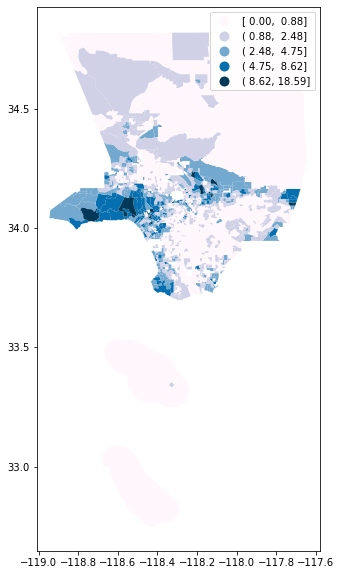

In [104]:
# Yes, that guess seems to be true
gdf.plot(figsize=(12,10),
    cmap='PuBu',
    column='Percent Doctorate degree',
    legend=True, 
    scheme='NaturalBreaks',
    k=5,
        )

Text(0.5, 1.0, 'Tracts in the top quintile of *percent* of Doctorate degrees')

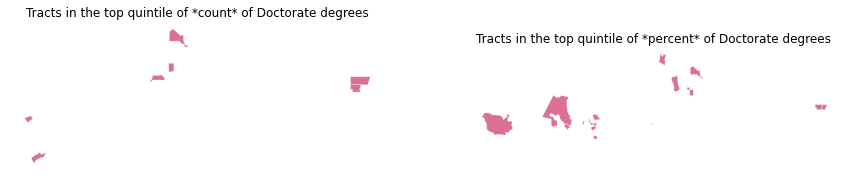

In [105]:
# I want to compare areas in the top fifth of absolute values of PhDs to areas in the top fifth of proportion of PhDs
# I pulled the values through running maps that divided the data into quintiles

fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs

#left map
gdf[gdf['Doctorate degree']>=397].plot(
            color='palevioletred', 
            edgecolor='white',
            linewidth=0.3,
            ax=ax1)

ax1.axis("off")
ax1.set_title("Tracts in the top quintile of *count* of Doctorate degrees")

# right map
gdf[gdf['Percent Doctorate degree']>=8.62].plot(
            color='palevioletred', 
            edgecolor='white',
            linewidth=0.3,
            ax=ax2, # this assigns the map to the subplot - ax=ax2 puts it on the right
           )

ax2.axis("off")
ax2.set_title("Tracts in the top quintile of *percent* of Doctorate degrees")

In [106]:
# It's a little hard to tell where these areas are, so I'm adding a submap

# First I project to webmercator
gdf_web_mercator = gdf.to_crs(epsg=3857)
gdf_web_mercator.head()

geoid                                   name   Total  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  3118.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  2687.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  4216.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  2646.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA  3263.0   

   5th grade  6th grade  7th grade  8th grade  9th grade  10th grade  \
1       26.0       24.0        0.0        7.0      131.0        44.0   
2        0.0       21.0       59.0        7.0        0.0        11.0   
3       54.0      101.0        0.0       24.0       30.0        93.0   
4       31.0       26.0       17.0       10.0        5.0        93.0   
5        0.0       28.0       32.0        0.0        0.0        34.0   

   11th grade  12th grade, no diploma  Regular high school diploma  \
1        52.0                    89.0                        711.0   
2         9.0                    16.0                        650.0   
3        31.0                    34.0                        906.0   
4        50.0                   103.0                        678.0   
5        84.0                    63.0                        772.0   

   GED or alternative credential  Some college, less than 1 year  \
1                           39.0                           228.0   
2                           77.0                           151.0   
3                           90.0                           265.0   
4                           46.0                           107.0   
5                           80.0                           185.0   

   Some college, 1 or more years, no degree  Bachelors degree  \
1                                     660.0             278.0   
2                                     495.0             277.0   
3                                     850.0             449.0   
4                                     470.0             197.0   
5                                     537.0             336.0   

   Associates degree  Masters degree  Professional school degree  \
1              486.0           120.0                        63.0   
2              511.0           257.0                         0.0   
3              694.0           207.0                        34.0   
4              404.0           170.0                        20.0   
5              519.0           342.0                       109.0   

   Doctorate degree                                           geometry  \
1              60.0  MULTIPOLYGON (((-13169350.794 4063591.834, -13...   
2             105.0  MULTIPOLYGON (((-13169467.902 4065613.937, -13...   
3              44.0  MULTIPOLYGON (((-13169034.646 4063225.625, -13...   
4              27.0  MULTIPOLYGON (((-13167528.939 4062726.771, -13...   
5              49.0  MULTIPOLYGON (((-13166671.668 4062511.964, -13...   

   Percent 5th grade  Percent 6th grade  Percent 7th Grade  Percent 8th Grade  \
1           0.833868           0.769724           0.000000           0.224503   
2           0.000000           0.781541           2.195757           0.260514   
3           1.280835           2.395636           0.000000           0.569260   
4           1.171580           0.982615           0.642479           0.377929   
5           0.000000           0.858106           0.980693           0.000000   

   Percent 9th Grade  Percent 10th Grade  Percent 11th Grade  \
1           4.201411            1.411161            1.667736   
2           0.000000            0.409378            0.334946   
3           0.711575            2.205882            0.735294   
4           0.188964            3.514739            1.889645   
5           0.000000            1.041986            2.574318   

   Percent 12th Grade, no diploma  Percent Regular high school diploma  \
1                        2.854394                            22.803079   
2                        0.595460                      

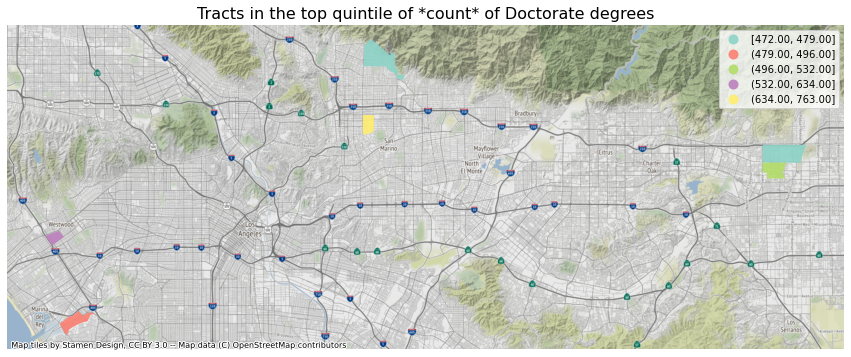

In [107]:
# And then make another graph that shows the top quintile of count of Doctorate degrees
# It seems like because these two graphs are at different scales, they may not be able to be compared side by side?
fig, ax = plt.subplots(figsize=(15, 15))

gdf_web_mercator[gdf_web_mercator['Doctorate degree'] >397].plot(ax=ax, alpha=0.9, 
    cmap='Set3',
    column='Doctorate degree',
    scheme='NaturalBreaks',
    k=5,
    legend=True)

ax.axis('off')

ax.set_title('Tracts in the top quintile of *count* of Doctorate degrees',fontsize=16)

ctx.add_basemap(ax)

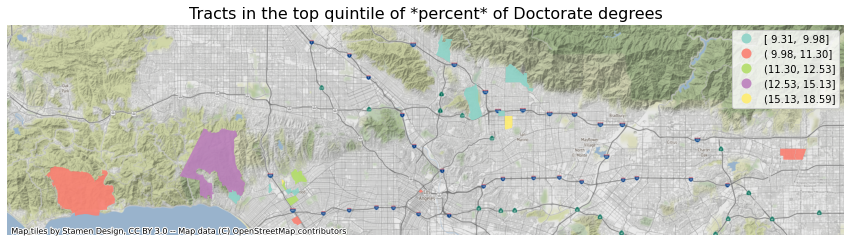

In [108]:
# I want to have two side-by-side maps with submaps, but when I try to do that, I keep getting an error message that says "UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 18). warnings.warn(msg)" 

# Instead, I first add a submap to the graph that shows the top quintile of percent of Doctorate degrees
fig, ax = plt.subplots(figsize=(15, 15))

gdf_web_mercator[gdf_web_mercator['Percent Doctorate degree'] >8.62].plot(ax=ax, alpha=0.9, 
    cmap='Set3',
    column='Percent Doctorate degree',
    scheme='NaturalBreaks',
    k=5,
    legend=True)

ax.axis('off')

ax.set_title('Tracts in the top quintile of *percent* of Doctorate degrees',fontsize=16)

ctx.add_basemap(ax)